In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string # Metin temizliği için
from collections import Counter

# Metin işleme kütüphaneleri
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
import nltk
from gensim.models import Word2Vec

# Makine Öğrenmesi ve Analiz Kütüphaneleri
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from wordcloud import WordCloud # wordcloud modülü kurulu değilse 'pip install wordcloud' ile kurun

# Uyarıları kapat (isteğe bağlı, ancak çıktıyı temiz tutar)
import warnings
warnings.filterwarnings("ignore")


In [32]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")


print("NLTK verileri kontrol ediliyor/indiriliyor...")
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt')
except LookupError:
     nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    nltk.download('stopwords')
except LookupError:
    nltk.download('stopwords')

english_stopwords = set(stopwords.words('english')) # İngilizce stop-word listesini 

print("NLTK kurulumu tamamlandı.")

NLTK verileri kontrol ediliyor/indiriliyor...
NLTK kurulumu tamamlandı.


In [33]:
file_path = "/Volumes/abdullah/Programlama/PYTHON/Miul/git_folder/Yayın/H&M Hurdaya Çıkarılan Ürün Veri Seti/handm.csv" # Dosya adını ve yolunu buraya yazın
try:
    df = pd.read_csv(file_path)
    print(f"\n'{file_path}' dosyası başarıyla yüklendi. Boyut: {df.shape}")
except FileNotFoundError:
    print(f"\nHata: '{file_path}' dosyası bulunamadı. kontrol et.")
    df = None # DataFrame yüklenemezse df None olur
    
if df is not None:
    df_working = df.copy() 
    print("İlk 5 Gözlem:")
    print(df_working.head())



'/Volumes/abdullah/Programlama/PYTHON/Miul/git_folder/Yayın/H&M Hurdaya Çıkarılan Ürün Veri Seti/handm.csv' dosyası başarıyla yüklendi. Boyut: (9677, 16)
İlk 5 Gözlem:
   Unnamed: 0   productId            productName brandName                                                url  price stockState  comingSoon  colorName  isOnline  colors                                        colorShades  newArrival         mainCatCode                                            details                                          materials
0           0   834333001            Derby Shoes       H&M  https://www2.hm.com/en_us/productpage.08343330...  49.99  Available       False      Black      True  272628                                           Charcoal       False   men_shoes_dressed  Derby shoes with open lacing at front. Canvas ...  COMPOSITION\nSole:Thermoplastic rubber 100%\nU...
1           1  1258600003    Pile-Lined Slippers       H&M  https://www2.hm.com/en_us/productpage.12586000...  24.99  Avail

In [34]:
print("\n" + "="*50)
print("EDA")
print("="*50)
df_working.info()
print(df_working.describe().T)




EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   9677 non-null   int64  
 1   productId    9677 non-null   int64  
 2   productName  9677 non-null   object 
 3   brandName    9677 non-null   object 
 4   url          9677 non-null   object 
 5   price        9677 non-null   float64
 6   stockState   9677 non-null   object 
 7   comingSoon   9677 non-null   bool   
 8   colorName    9677 non-null   object 
 9   isOnline     9677 non-null   bool   
 10  colors       9677 non-null   object 
 11  colorShades  6511 non-null   object 
 12  newArrival   9677 non-null   bool   
 13  mainCatCode  9677 non-null   object 
 14  details      9676 non-null   object 
 15  materials    9518 non-null   object 
dtypes: bool(3), float64(1), int64(2), object(10)
memory usage: 1011.3+ KB
             count          mean           std           

In [35]:
print("\nKategorik  Eşsiz Değerler ve Frekanslari:")
for col in df_working.select_dtypes(include='object').columns:
    print(f"\n'{col}' Sütunu:")
    print(df_working[col].value_counts().head(10))




Kategorik  Eşsiz Değerler ve Frekanslari:

'productName' Sütunu:
productName
Ribbed Tank Top               63
Padded Triangle Bikini Top    42
Loose Fit Hoodie              37
Loose Fit Sweatshirt          36
Loose Fit Printed Hoodie      36
Sneakers                      34
Nail Polish                   34
Oversized Printed T-shirt     34
Fitted T-shirt                34
Eyeshadow                     32
Name: count, dtype: int64

'brandName' Sütunu:
brandName
H&M    9677
Name: count, dtype: int64

'url' Sütunu:
url
https://www2.hm.com/en_us/productpage.1194925001.html    4
https://www2.hm.com/en_us/productpage.1236250001.html    4
https://www2.hm.com/en_us/productpage.1248618003.html    4
https://www2.hm.com/en_us/productpage.1241642001.html    4
https://www2.hm.com/en_us/productpage.1217228002.html    4
https://www2.hm.com/en_us/productpage.1252832001.html    4
https://www2.hm.com/en_us/productpage.1239744003.html    3
https://www2.hm.com/en_us/productpage.1193143005.html    3
https:

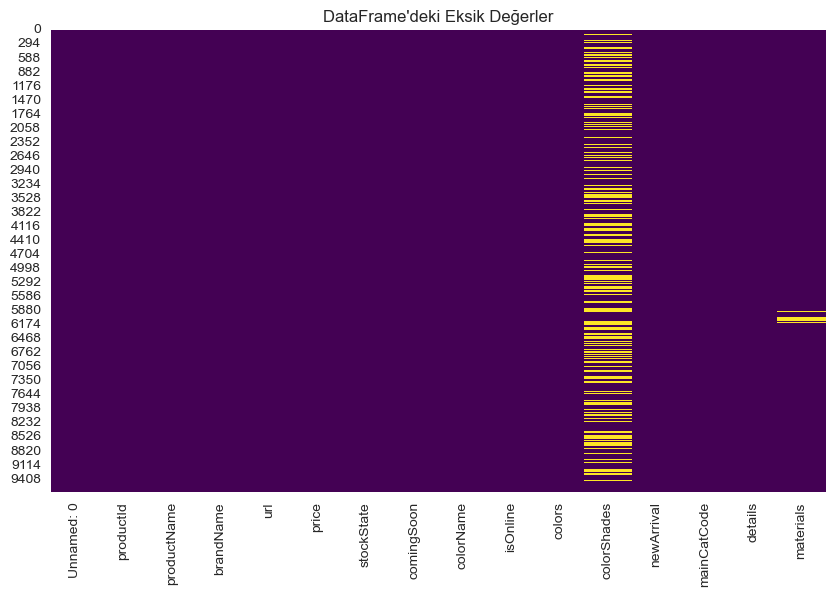

In [36]:
"Eksik değerler (heatMap)"
plt.figure(figsize=(10, 6))
sns.heatmap(df_working.isnull(), cbar=False, cmap='viridis')
plt.title('DataFrame\'deki Eksik Değerler')
plt.show()


burada veri kümesini incele


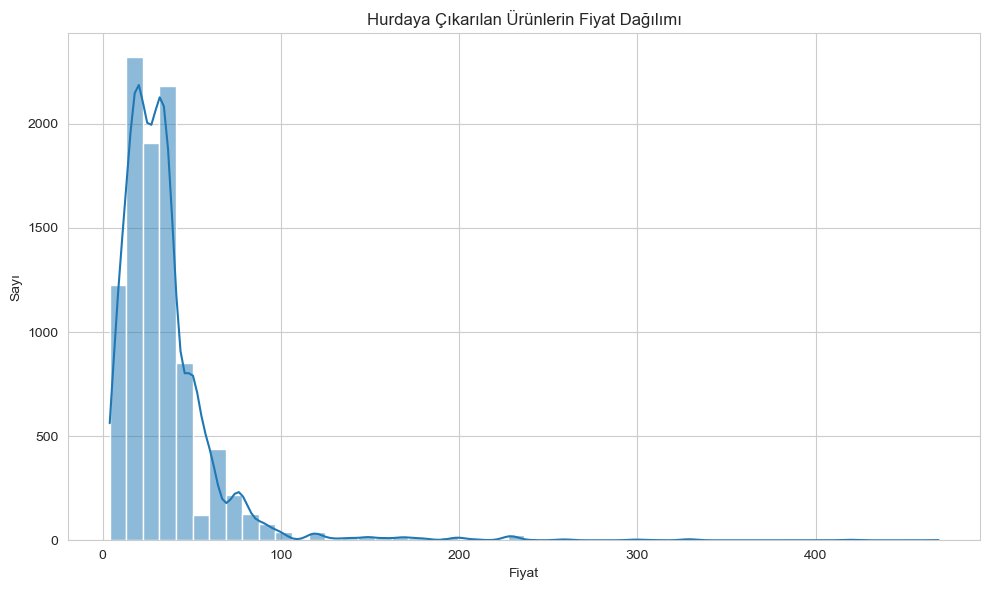

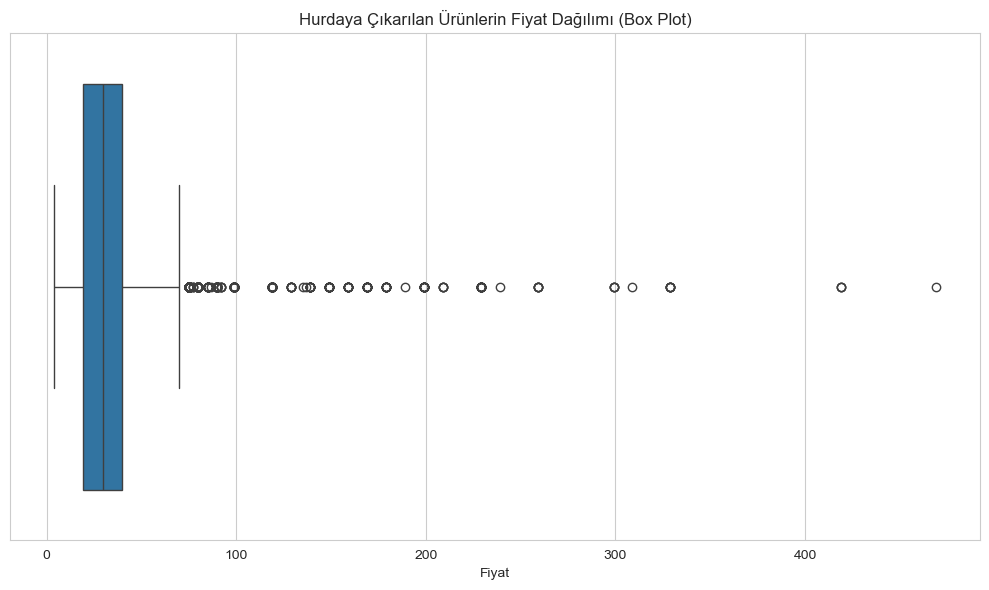

In [ ]:
if 'price' in df_working.columns and pd.api.types.is_numeric_dtype(df_working['price']):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_working, x='price', bins=50, kde=True) 
    plt.title('Hurdaya Çıkarılan Ürünlerin Fiyat Dağılımı')
    plt.xlabel('Fiyat')
    plt.ylabel('Sayı')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_working, x='price')
    plt.title('Hurdaya Çıkarılan Ürünlerin Fiyat Dağılımı (Box Plot)')
    plt.xlabel('Fiyat')
    plt.tight_layout()
    plt.show()
else:
    print("\n'price' gibi sayısal bir sütun bulunamadı veya sayısal değil. Fiyat dağılım grafikleri atlandı.")
    

In [44]:
print("\n" + "="*50)
print("TEMİZLİK")
print("="*50)

print(f"\nTemizleme öncesi 'materials' eksik değer sayısı: {df_working['materials'].isnull().sum()}")
    
df_working['materials'] = df_working['materials'].fillna('')
print(f"Temizleme sonrası 'materials' eksik değer sayısı: {df_working['materials'].isnull().sum()}")


def clean_text(text):
    """Metin temizleme küçük harf, noktalama işareti ve sayı kaldırma."""
    if not isinstance(text, str): # String olmayan girdileri boş string yap
        return ""
    text = text.lower() 
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text) 
    text = re.sub(r'\d+', '', text) 
    text = text.strip() 
    return text
df_working['clean_materials'] = df_working['materials'].apply(clean_text)


TEMİZLİK

Temizleme öncesi 'materials' eksik değer sayısı: 159
Temizleme sonrası 'materials' eksik değer sayısı: 0


In [45]:
def remove_stopwords(text, stop_words):
    """ stop-wordleri kaldır"""
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)
df_working['cleaned_text_stopwords'] = df_working['clean_materials'].apply(lambda x: remove_stopwords(x, english_stopwords))


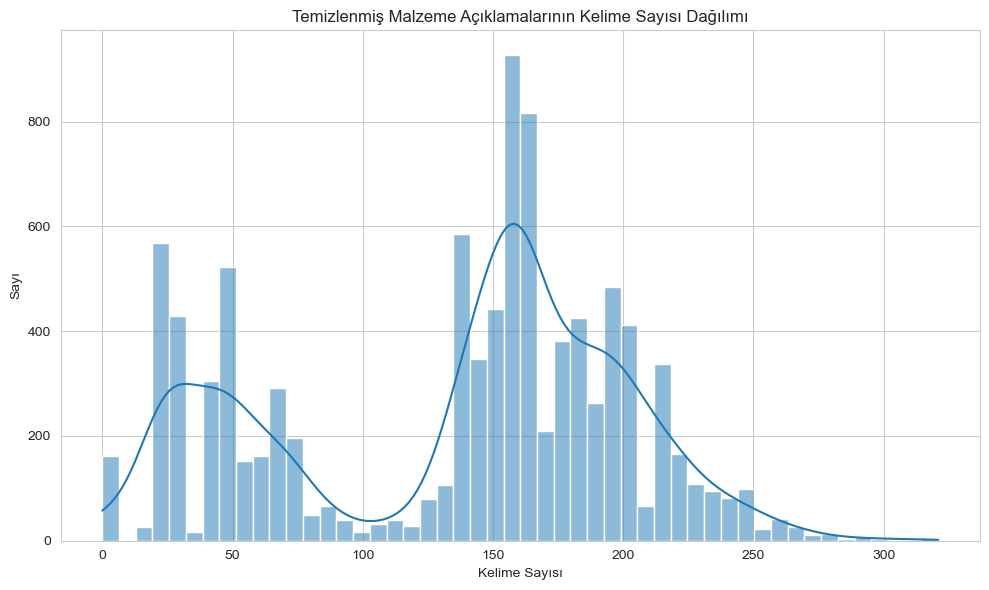

In [46]:
df_working['text_length'] = df_working['cleaned_text_stopwords'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df_working, x='text_length', bins=50, kde=True)
plt.title('Temizlenmiş Malzeme Açıklamalarının Kelime Sayısı Dağılımı')
plt.xlabel('Kelime Sayısı')
plt.ylabel('Sayı')
plt.tight_layout()
plt.show()

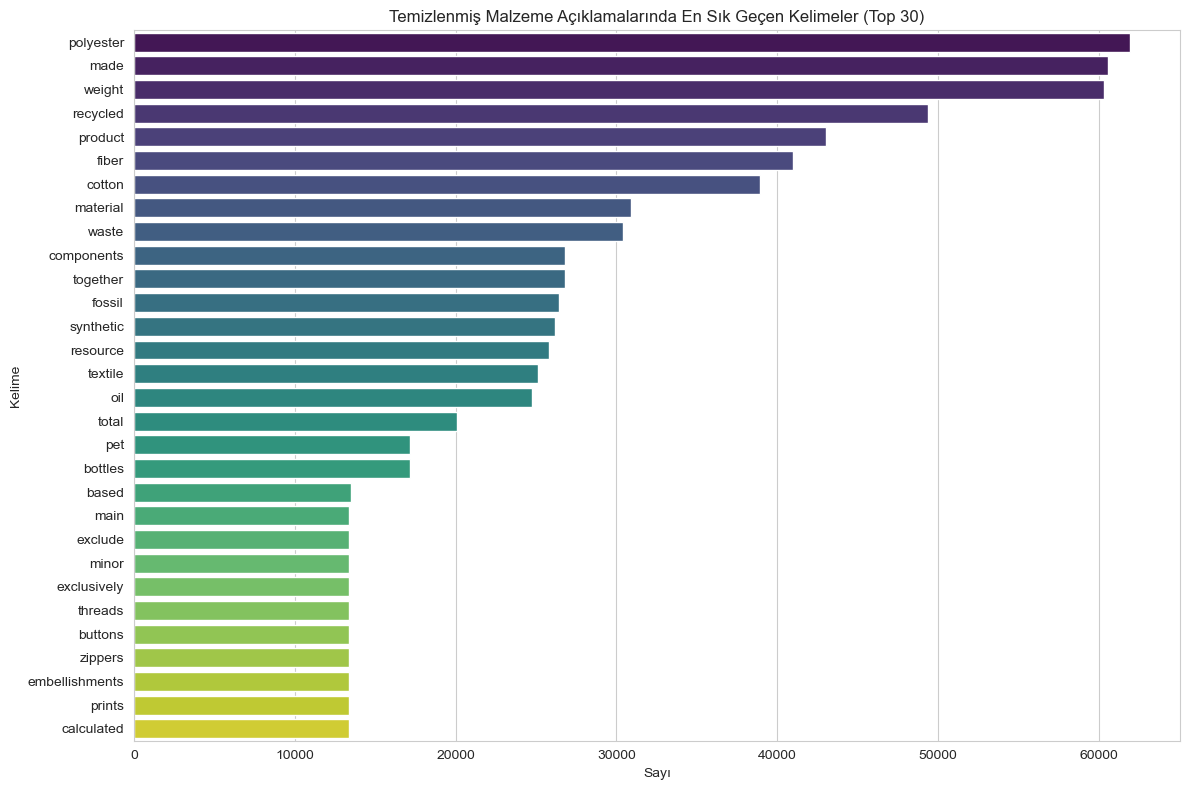

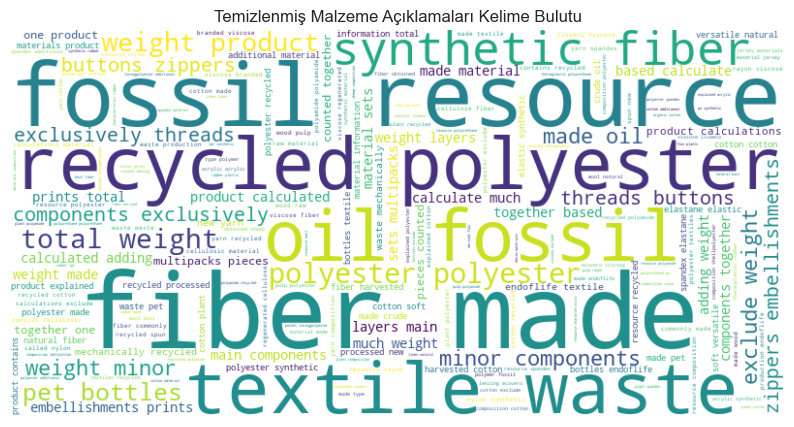

In [47]:
all_clean_text = " ".join(df_working['cleaned_text_stopwords'])
words = all_clean_text.split()
word_counts = Counter(words)

if word_counts: 
       
    most_common_words = word_counts.most_common(30)
    words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])

    plt.figure(figsize=(12, 8))
    sns.barplot(data=words_df, x='count', y='word', palette='viridis')
    plt.title('Temizlenmiş Malzeme Açıklamalarında En Sık Geçen Kelimeler (Top 30)')
    plt.xlabel('Sayı')
    plt.ylabel('Kelime')
    plt.tight_layout()
    plt.show()

        
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_clean_text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Temizlenmiş Malzeme Açıklamaları Kelime Bulutu')
    plt.show()
else:
    print("\nEn sık geçen kelimeler grafiği ve kelime bulutu oluşturmak için yeterli temizlenmiş metin yok.")
    

In [48]:
nlp = spacy.load("en_core_web_sm") 
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])
df_working['lemmatized_text'] = df_working['cleaned_text_stopwords'].apply(lemmatize_text)
print(df_working[['cleaned_text_stopwords', 'lemmatized_text']].head())

                              cleaned_text_stopwords                                    lemmatized_text
0  composition solethermoplastic rubber upperpoly...  composition solethermoplastic rubber upperpoly...
1  composition liningpolyester upperpolyurethane ...  composition liningpolyester upperpolyurethane ...
2  composition lining insolecotton upperpolyester...  composition line insolecotton upperpolyester s...
3  composition liningpolyester upperpolyester sol...  composition liningpolyester upperpolyester sol...
4  composition liningpolyester upperpolyurethane ...  composition liningpolyester upperpolyurethane ...


In [49]:
# TF-IDF Vektörleştirmesi 
tfidf_vectorizer = TfidfVectorizer(max_features=1000) 
X_tfidf = tfidf_vectorizer.fit_transform(df_working['cleaned_text_stopwords'])
print(f"\nTF-IDF vektör matrisi oluşturuldu. Boyut: {X_tfidf.shape}")
# tfidf_vectorizer.get_feature_names_out() 
    # Kelime Sıklıkları 
count_vectorizer = CountVectorizer(max_features=1000)
X_count = count_vectorizer.fit_transform(df_working['cleaned_text_stopwords'])
print(f"Count vektör matrisi oluşturuldu. Boyut: {X_count.shape}")


TF-IDF vektör matrisi oluşturuldu. Boyut: (9677, 593)
Count vektör matrisi oluşturuldu. Boyut: (9677, 593)


In [50]:

sentences = [text.split() for text in df_working['cleaned_text_stopwords']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4)
print(f"\nWord2Vec modeli eğitildi. Kelime sayısı: {len(word2vec_model.wv)}")
    #     # Örnek: 'cotton' kelimesine en benzer kelimeler
if 'cotton' in word2vec_model.wv:
    print(word2vec_model.wv.most_similar('cotton'))



Word2Vec modeli eğitildi. Kelime sayısı: 453
[('plant', 0.5926876068115234), ('harvested', 0.5139123201370239), ('linen', 0.5091802477836609), ('versatile', 0.48574861884117126), ('organic', 0.47229239344596863), ('natural', 0.4594769775867462), ('soft', 0.4423646628856659), ('inconversion', 0.40678665041923523), ('cashmere', 0.4044024646282196), ('fiber', 0.3937983512878418)]


In [51]:
print("\n" + "="*50)
print("MODELLEME")
print("="*50)

num_clusters = 5 
if X_tfidf.shape[0] > num_clusters: 
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10) 
    df_working['material_cluster'] = kmeans.fit_predict(X_tfidf)
    print(f"\nMalzeme açıklamaları {num_clusters} kümeye ayrildi")
    print(df_working['material_cluster'].value_counts().sort_index())

    for i in range(num_clusters):
        print(f"\n--- Küme {i} ---")
        print(df_working[df_working['material_cluster'] == i]['cleaned_text_stopwords'].sample(min(5, (df_working['material_cluster'] == i).sum())).tolist())

else:
    print(f"\nDataFrame boyutu ({X_tfidf.shape[0]}) küme sayısından ({num_clusters}) küçük veya eşit. Kümeleme yapılamadı.")




MODELLEME

Malzeme açıklamaları 5 kümeye ayrildi
material_cluster
0    1373
1    3295
2    1500
3    2078
4    1431
Name: count, dtype: int64

--- Küme 0 ---
['composition cotton additional material information total weight product contains recycled cotton exclude weight minor components exclusively threads buttons zippers embellishments prints total weight product calculated adding weight layers main components together based calculate much weight made material sets multipacks pieces counted together one product calculations exclude weight minor components exclusively threads buttons zippers embellishments prints total weight product calculated adding weight layers main components together based calculate much weight made material sets multipacks pieces counted together one product calculations material denim materials product explained cotton cotton soft versatile natural fiber harvested cotton plant recycled cotton recycled cotton cotton made textile waste production endoflife text

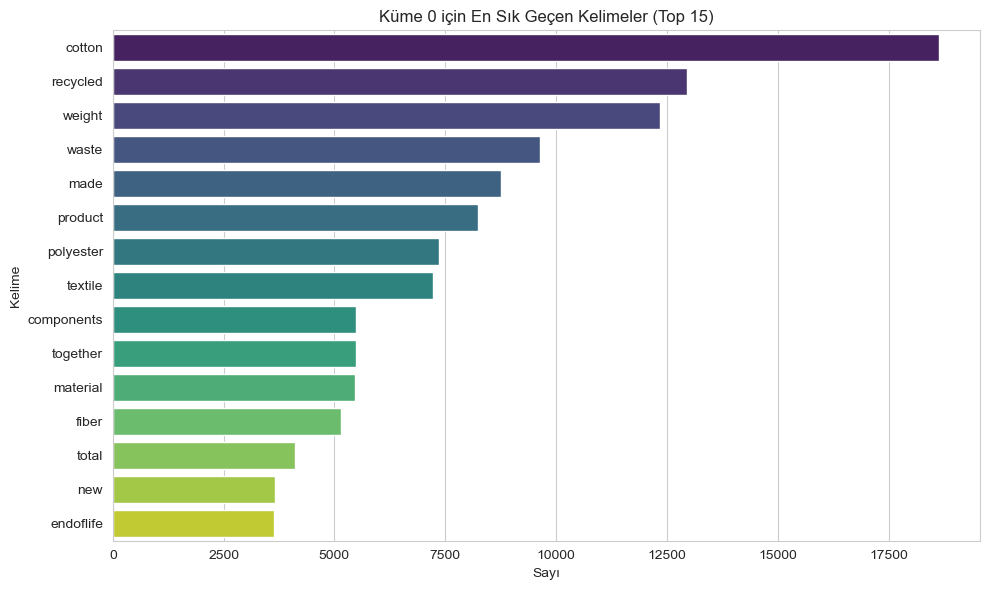

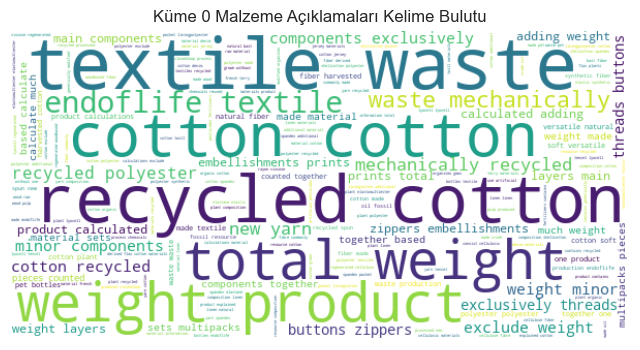

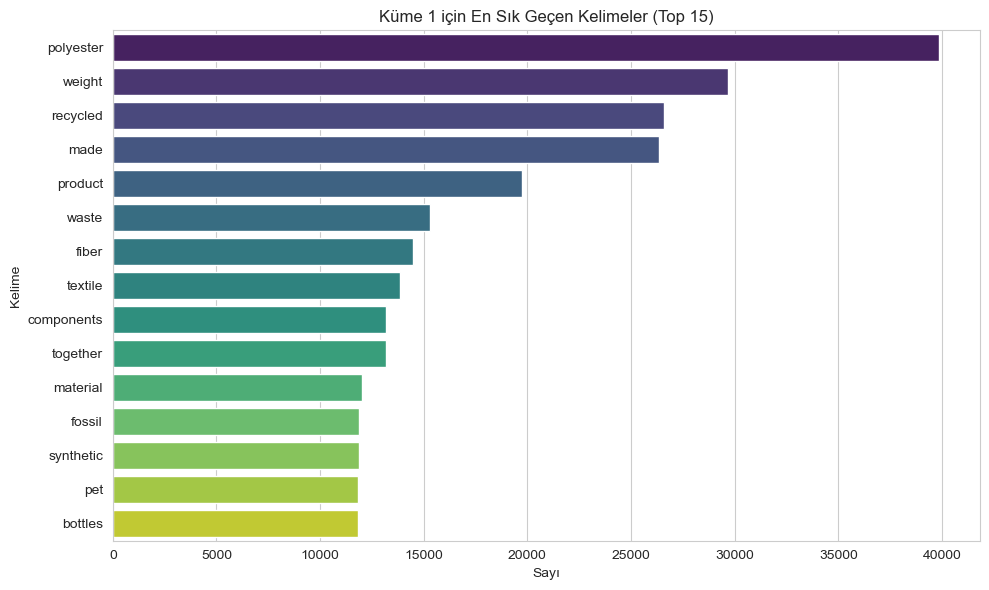

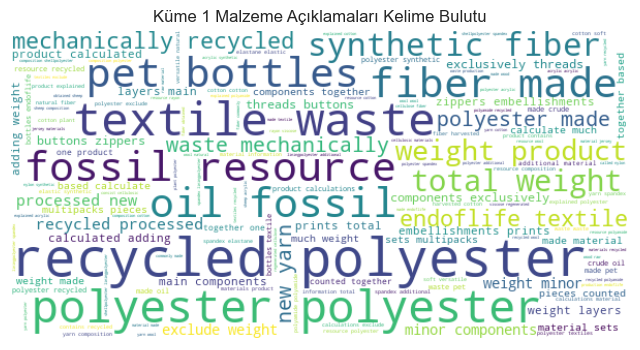

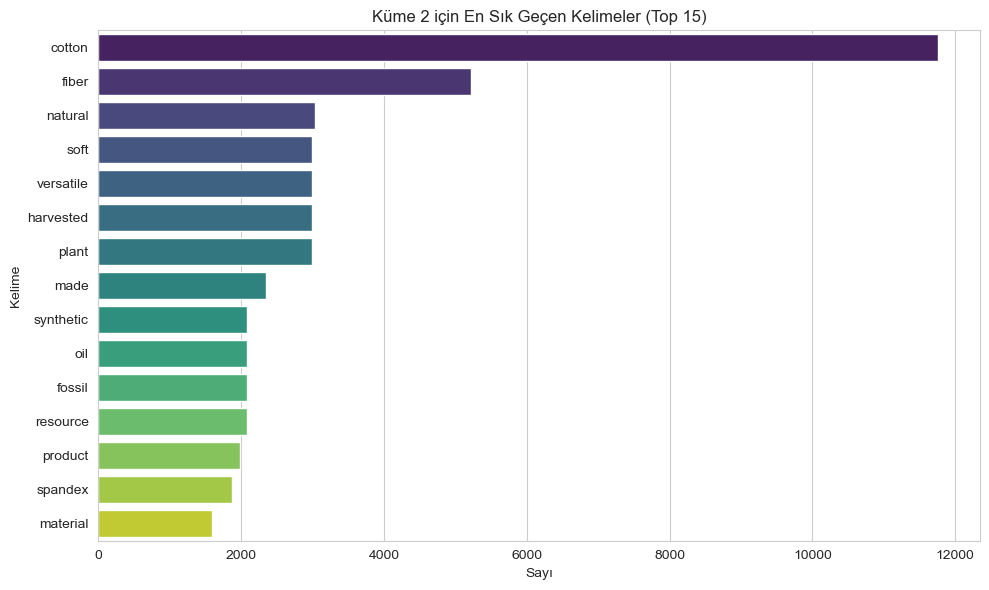

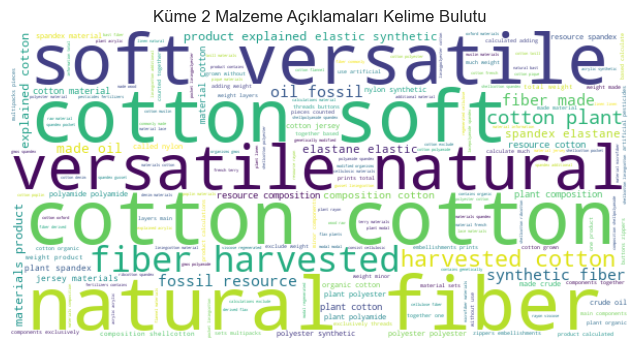

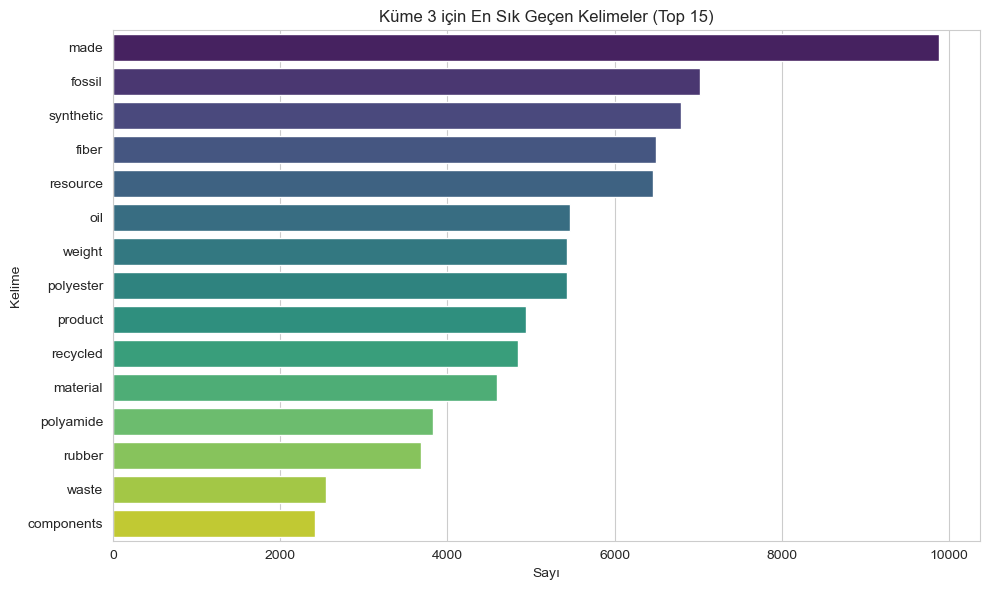

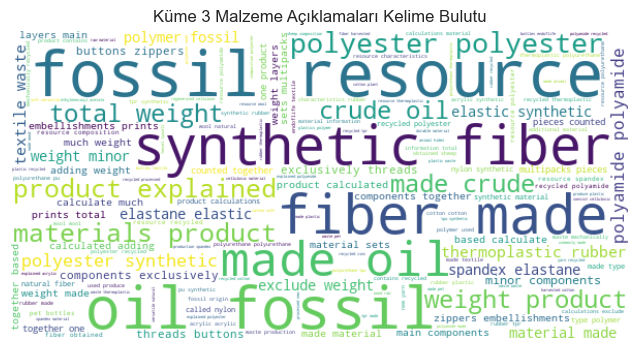

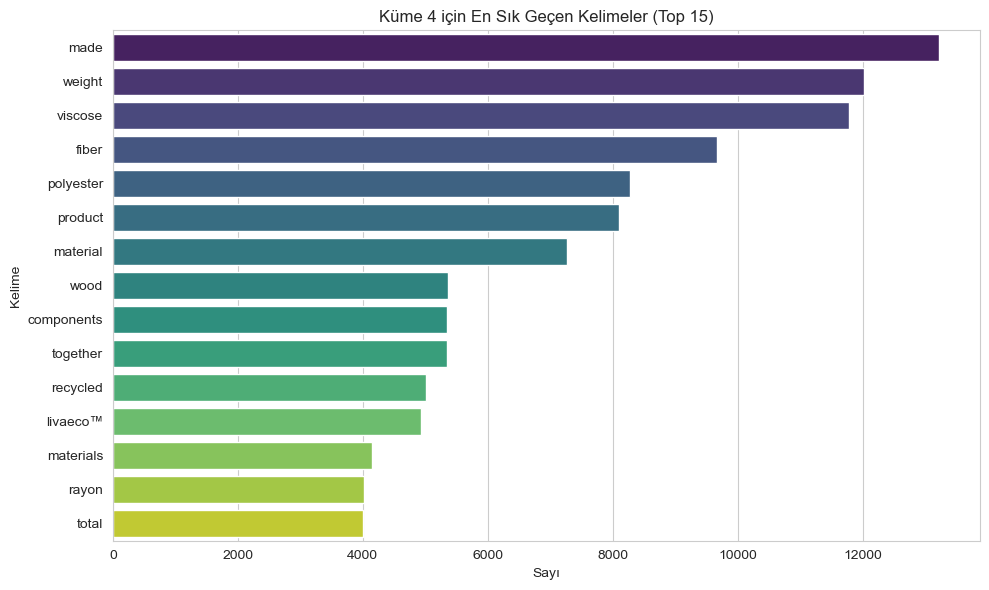

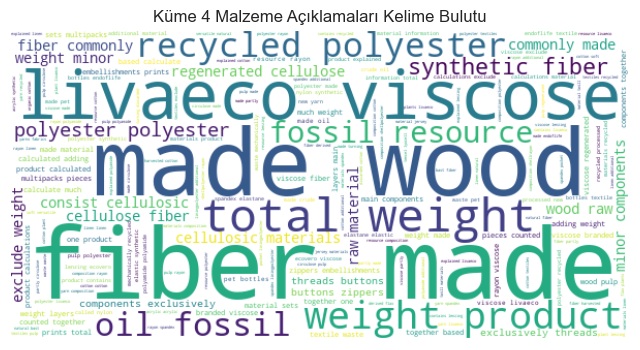

In [52]:
for i in range(num_clusters):
    cluster_text = " ".join(df_working[df_working['material_cluster'] == i]['cleaned_text_stopwords'])

    if cluster_text:
                 
        cluster_words = cluster_text.split()
        cluster_word_counts = Counter(cluster_words)
        most_common_cluster_words = cluster_word_counts.most_common(15) # Küme için en sık 15 kelime
        if most_common_cluster_words:
            words_df_cluster = pd.DataFrame(most_common_cluster_words, columns=['word', 'count'])
            plt.figure(figsize=(10, 6))
            sns.barplot(data=words_df_cluster, x='count', y='word', palette='viridis')
            plt.title(f'Küme {i} için En Sık Geçen Kelimeler (Top 15)')
            plt.xlabel('Sayı')
            plt.ylabel('Kelime')
            plt.tight_layout()
            plt.show()
        else:
            print(f"Küme {i} için en sık geçen kelime grafiği oluşturulamadı (kelime yok).")


                 
        cluster_wordcloud = WordCloud(width=600, height=300, background_color='white').generate(cluster_text)
        plt.figure(figsize=(8, 5))
        plt.imshow(cluster_wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Küme {i} Malzeme Açıklamaları Kelime Bulutu')
        plt.show()
    else:
        print(f"\nKüme {i} için metin bulunamadı. Görselleştirme atlandı.")
        

In [53]:
  # Kosinüs Benzerliği
print("\nBenzer Açıklamalarını Bul:")
query = "cotton polyester blend" 
query_cleaned = clean_text(query) 
query_stopwords_removed = remove_stopwords(query_cleaned, english_stopwords) 

if query_stopwords_removed: # Sorgu boş değilse devam et
    query_vec = tfidf_vectorizer.transform([query_stopwords_removed])
    similarities = cosine_similarity(query_vec, X_tfidf).flatten()
    num_similar_items = 5
    sorted_indices = similarities.argsort()[::-1]
    top_n_indices = [idx for idx in sorted_indices if similarities[idx] < 1.0 - 1e-9][:num_similar_items]

    if top_n_indices:
        print(f"\n'{query}' sorgusuna en benzer {num_similar_items} malzeme aciklamasi:")
           
        print(df_working.iloc[top_n_indices][['materials', 'cleaned_text_stopwords', 'material_cluster'] if 'material_cluster' in df_working.columns else ['materials', 'cleaned_text_stopwords']])
        print("\nBenzerlik Skorlari:")
        print([similarities[idx] for idx in top_n_indices]) 
    else:
        print(f"\n'{query}' sorgusuna benzer bir sonuc bulunamadi.")
else:
    print(f"'{query}' çok temizlendi")




Benzer Açıklamalarını Bul:

'cotton polyester blend' sorgusuna en benzer 5 malzeme aciklamasi:
                                              materials                             cleaned_text_stopwords  material_cluster
1880  COMPOSITION\nCotton 90%, Polyester 10% , Mater...  composition cotton polyester material cotton m...                 2
3537  COMPOSITION\nCotton 95%, Polyester 5% , Materi...  composition cotton polyester material cotton j...                 2
3633  COMPOSITION\nCotton 95%, Polyester 5% , Materi...  composition cotton polyester material cotton j...                 2
4230  COMPOSITION\nCotton 95%, Polyester 5% , Materi...  composition cotton polyester material cotton j...                 2
3440  COMPOSITION\nCotton 95%, Polyester 5% , Materi...  composition cotton polyester material cotton j...                 2

Benzerlik Skorlari:
[0.8079052896040687, 0.8008998456583744, 0.8008998456583744, 0.8008998456583744, 0.8008998456583744]



Malzeme Açıklaması Vektörlerinin Boyut İndirgenerek Görselleştirilmesi:
PCA uygulanıyor...
PCA ile boyut 2'ye indirildi. Açıklanan toplam varyans oranı: 0.4083


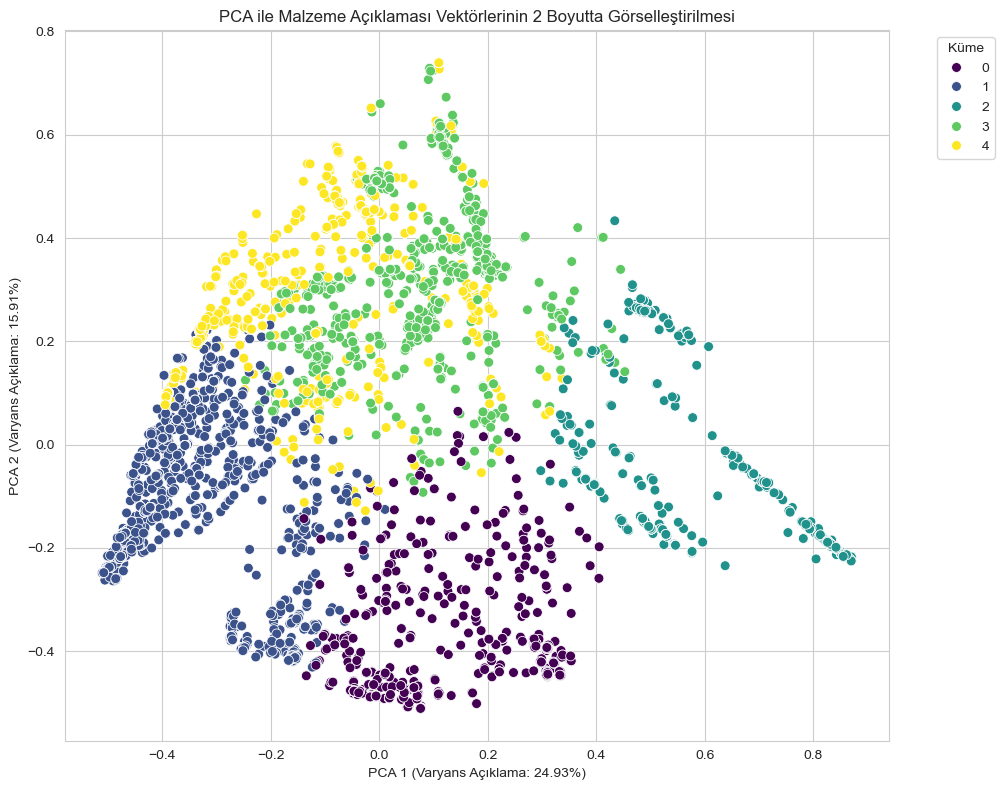

In [54]:
if X_tfidf.shape[0] > 1: 
    print("\nMalzeme Açıklaması Vektörlerinin Boyut İndirgenerek Görselleştirilmesi:")
    
    if X_tfidf.shape[1] > 2: 
        print("PCA uygulanıyor...")
        pca = PCA(n_components=2, random_state=42)
            
        X_pca = pca.fit_transform(X_tfidf.toarray())
        print(f"PCA ile boyut 2'ye indirildi. Açıklanan toplam varyans oranı: {pca.explained_variance_ratio_.sum():.4f}")

        plt.figure(figsize=(12, 8))
             
        hue_data = df_working['material_cluster'] if 'material_cluster' in df_working.columns else None
        legend_title = 'Küme' if hue_data is not None else None 
        sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hue_data, palette='viridis', s=50, legend='full' if hue_data is not None else False)
        plt.title('PCA ile Malzeme Açıklaması Vektörlerinin 2 Boyutta Görselleştirilmesi')
        plt.xlabel(f'PCA 1 (Varyans Açıklama: {pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'PCA 2 (Varyans Açıklama: {pca.explained_variance_ratio_[1]:.2%})')
        if hue_data is not None:
            plt.legend(title=legend_title, bbox_to_anchor=(1.05, 1), loc='upper left') 
        plt.grid(True)
        plt.tight_layout(rect=[0, 0, 0.85, 1]) 
        plt.show()
else:
    print("TF-IDF boyutu 2 veya daha az olduğu için PCA uygulanmadı.")

In [56]:
print("\n" + "="*50)
print("CIKARIM")
print("="*50)


if 'material_cluster' in df_working.columns:
    print(f"- KMeans kümelemesi, malzeme aciklamalari {num_clusters} gruba ayirildi. ")
        
    print("\nKüme Merkezlerine En Yakın Kelimeler:")
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = tfidf_vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print(f"Küme {i} için en temsili kelimeler:", end='')
        for ind in order_centroids[i, :10]: 
            print(f' {terms[ind]}', end='')
        print()


print(f"\n- Kosinüs benzerliği, '{query}' gibi sorgulara benzer acıklamaları bulduk.")
if top_n_indices:
    print(f"  Bulunan benzer {len(top_n_indices)} açıklama ve benzerlik skorları")


if X_tfidf.shape[0] > 1 and X_tfidf.shape[1] > 2:
    print("- PCA ile 2 boyuta indirgendi. Bu görselleştirme, kümelerin ayrılıp ayrılmadığını veya verinin genel dağılımını göstermektedir.")
   
else:
    print("\nDataFrame yüklenemediği için analiz adımları atlandı.")


CIKARIM
- KMeans kümelemesi, malzeme aciklamalari 5 gruba ayirildi. 

Küme Merkezlerine En Yakın Kelimeler:
Küme 0 için en temsili kelimeler: cotton recycled weight waste textile polyester made product together components
Küme 1 için en temsili kelimeler: polyester weight recycled made waste bottles pet textile product together
Küme 2 için en temsili kelimeler: cotton versatile plant harvested soft fiber natural spandex oil resource
Küme 3 için en temsili kelimeler: polyamide made polyester fossil synthetic resource oil fiber rubber polyurethane
Küme 4 için en temsili kelimeler: viscose livaeco weight made wood rayon polyester fiber product pulp

- Kosinüs benzerliği, 'cotton polyester blend' gibi sorgulara benzer acıklamaları bulduk.
  Bulunan benzer 5 açıklama ve benzerlik skorları
- PCA ile 2 boyuta indirgendi. Bu görselleştirme, kümelerin ayrılıp ayrılmadığını veya verinin genel dağılımını göstermektedir.
